In [1]:
include(joinpath("..","src","setup.jl"))
datadir = joinpath("..","data","count_lengths","run_2018-11-26")

┌ Info: Precompiling AuditoryBistabilityLE [7e25a372-ade5-11e8-17af-a30e5a9e2c28]
└ @ Base loading.jl:1186
┌ Warning: REPL initialization failed, Revise is not in automatic mode. Call `revise()` manually.
└ @ Revise /Users/davidlittle/.julia/packages/Revise/agmgx/src/Revise.jl:982


┌ Info: Loading RCall ggplot2 backend for `PlotAxes`
└ @ PlotAxes /Users/davidlittle/.julia/packages/PlotAxes/qhBmp/src/PlotAxes.jl:185
┌ Warning: RCall.jl: Warning: package ‘ggplot2’ was built under R version 3.5.2
└ @ RCall /Users/davidlittle/.julia/packages/RCall/iojZI/src/io.jl:113
┌ Info: Loading DataFrames support into Gadfly.jl
└ @ Gadfly /Users/davidlittle/.julia/packages/Gadfly/09PWZ/src/mapping.jl:228
┌ Info: Loading Gadfly backend for `PlotAxes`
└ @ PlotAxes /Users/davidlittle/.julia/packages/PlotAxes/qhBmp/src/PlotAxes.jl:204


"../data/count_lengths/run_2018-11-26"

In [3]:
params = load_params(joinpath(datadir,"params.jld2"))
params[:pindex] = 1:size(params,1)
settings = joinpath("..","src","settings.toml")
settings = TOML.parsefile(settings)

Dict{AbstractString,Any} with 9 entries:
  "percept_lengths" => Dict{AbstractString,Any}("threshold"=>0.2,"min_length"=>…
  "freqs"           => Dict{AbstractString,Any}("bistable"=>Dict{AbstractString…
  "mask"            => Dict{AbstractString,Any}("window"=>0.5,"delta"=>0.25)
  "rates"           => Dict{AbstractString,Any}("freqbound"=>Dict{AbstractStrin…
  "scales"          => Dict{AbstractString,Any}("bistable"=>Dict{AbstractString…
  "stimulus"        => Dict{AbstractString,Any}("repeats"=>100,"pattern"=>"aba_…
  "track"           => Dict{AbstractString,Any}("bistable"=>Dict{AbstractString…
  "nmf"             => Dict{AbstractString,Any}("skipframes"=>0,"tol"=>0.001,"n…
  "bandwidth_ratio" => Dict{AbstractString,Any}("window"=>0.8,"full_band_ratio"…

In [4]:
p = copy(params[select_params(params,t_c_a=5,t_c_m=5,Δf=6),:])

,f_W_m_σ,f_c_m,t_c_a,t_c_m,f,t_W_m_c,t_c_x,f_c_x,t_W_m_σ_t
,Float64,Float64,Float64,Float64,Quantity…,Float64,Float64,Float64,Float64
1,5.6,0.0,5.0,5.0,500 Hz,6.0,3.0,3.0,7.0


In [ ]:
result = bistable_model(p,settings,intermediate_results=true);

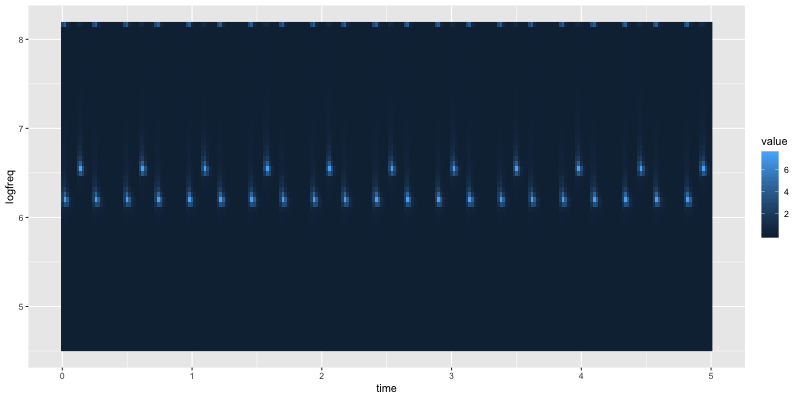

RObject{VecSxp}


In [23]:
plotaxes(result.spect.result[0s .. 5s],quantize=(500,128))

┌ Warning: Ignoring phase of complex value
└ @ PlotAxes /Users/davidlittle/.julia/packages/PlotAxes/qhBmp/src/ggplot2.jl:23


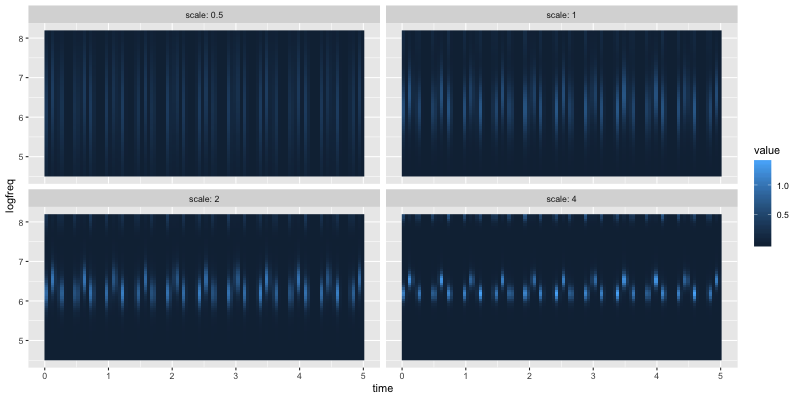

RObject{VecSxp}


In [32]:
plotaxes(result.cortical.result[0s .. 5s],:time,:freq,:scale)

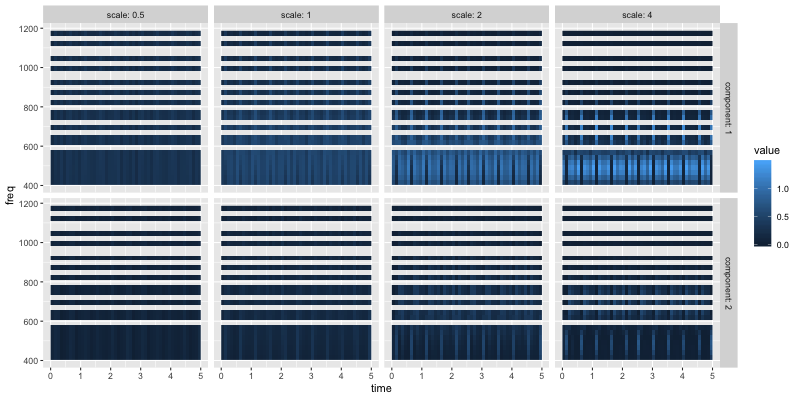

RObject{VecSxp}


In [38]:
plotaxes(result.cohere[0s .. 5s],:time,:freq => nearlog,:scale,:component)